In [1]:
import numpy as np
import pandas as pd


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset1 = pd.read_csv('supply.csv')

dataset2 = pd.read_csv('demand.csv')
hpi=pd.read_csv('hpi.csv')


In [4]:
hpi.head()

,DATE,CSUSHPISA
0,2003-01-01,128.460
1,2003-02-01,129.355
2,2003-03-01,130.147
3,2003-04-01,130.884
4,2003-05-01,131.734


In [5]:
dataset1['DATE'] = pd.to_datetime(dataset1['DATE'])
dataset1['DATE'] = pd.to_datetime(dataset1.DATE, format='%Y-%m-%d')
dataset2['DATE'] = pd.to_datetime(dataset2['DATE'])
dataset2['DATE'] = pd.to_datetime(dataset2.DATE, format='%Y-%m-%d')
hpi['DATE'] = pd.to_datetime(hpi['DATE'])
hpi['DATE'] = pd.to_datetime(hpi.DATE, format='%Y-%m-%d')

In [6]:
dataset3 = pd.merge(dataset1, dataset2)
dataset3.to_csv('dataset3.csv', index=False)

In [7]:
HPI = pd.merge(dataset3, hpi)
HPI.to_csv('HPI.csv', index=False)

In [8]:
HPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   21 non-null     datetime64[ns]
 1   Construction_Spending  21 non-null     int64         
 2   Median_Sale_price      21 non-null     int64         
 3   PERMIT                 21 non-null     int64         
 4   Available_Homes        21 non-null     int64         
 5   GDP                    21 non-null     float64       
 6   Median_Earnings        21 non-null     float64       
 7   MORTGAGE_Rates(%)      21 non-null     object        
 8   Unemplyment(%)         21 non-null     object        
 9   CSUSHPISA              21 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 1.8+ KB


In [9]:
HPI.head()

,DATE,Construction_Spending,Median_Sale_price,PERMIT,Available_Homes,GDP,Median_Earnings,MORTGAGE_Rates(%),Unemplyment(%),CSUSHPISA
0,2003-01-01,863855,181700,1808,1654,13619.43,615.0,5.84,5.87,128.460
1,2004-01-01,938525,209500,1952,1709,14212.34,629.0,5.60,5.70,141.646
2,2005-01-01,1046082,223100,2139,1892,14767.85,647.0,5.77,5.30,161.288
3,2006-01-01,1195642,244900,2212,2036,15244.09,662.0,6.25,4.73,182.320
4,2007-01-01,1137917,254400,1626,1822,15478.96,687.0,6.21,4.50,184.516


In [10]:
HPI['DATE'] = pd.to_datetime(HPI['DATE'])
HPI['DATE'] = pd.to_datetime(HPI.DATE, format='%Y-%m-%d')

In [11]:
HPI =HPI.drop('DATE', axis=1)

In [12]:
HPI.head()

,Construction_Spending,Median_Sale_price,PERMIT,Available_Homes,GDP,Median_Earnings,MORTGAGE_Rates(%),Unemplyment(%),CSUSHPISA
0,863855,181700,1808,1654,13619.43,615.0,5.84,5.87,128.460
1,938525,209500,1952,1709,14212.34,629.0,5.60,5.70,141.646
2,1046082,223100,2139,1892,14767.85,647.0,5.77,5.30,161.288
3,1195642,244900,2212,2036,15244.09,662.0,6.25,4.73,182.320
4,1137917,254400,1626,1822,15478.96,687.0,6.21,4.50,184.516


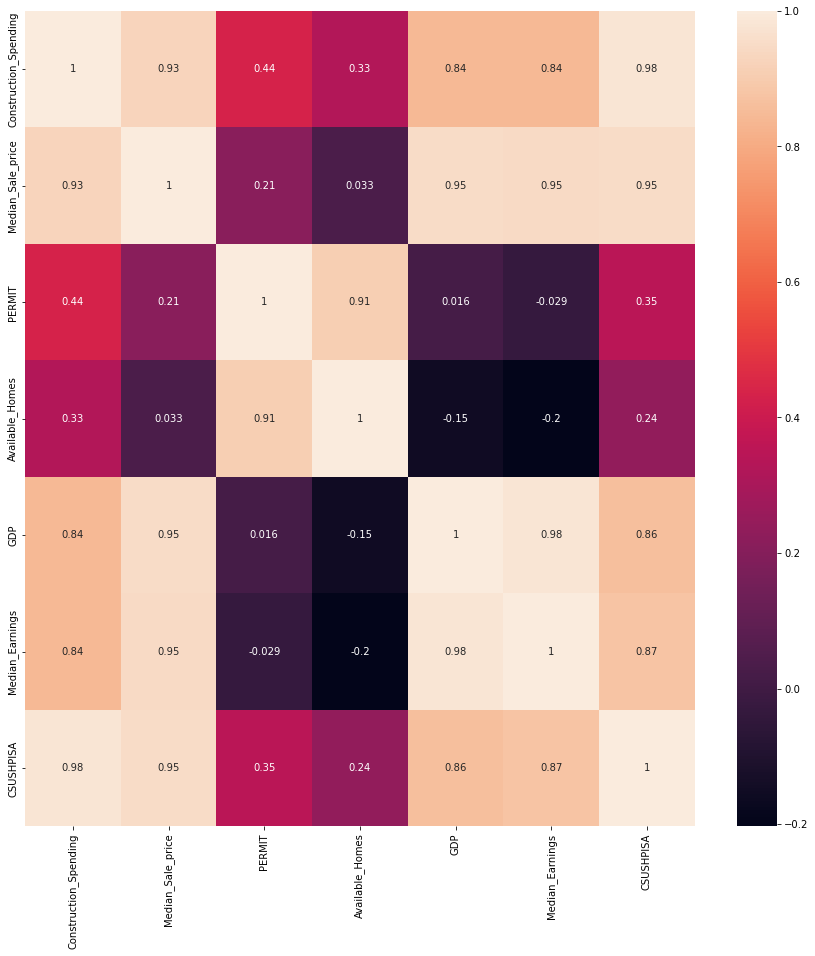

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(HPI.corr(),annot=True)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
X=HPI.drop(['CSUSHPISA'],axis=1)
y=HPI['CSUSHPISA']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [21]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.96102321, 0.95113037, 0.9368863 , 0.96033527, 0.97046016])

In [28]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest' :{
            'model':  RandomForestRegressor(),
            'params': {
                'n_estimators': [200, 700],
                'max_features': ['auto', 'sqrt', 'log2']
                
            }
        },
        'GradientBoostingRegressor()':{
            'model':GradientBoostingRegressor(),
            'params': {
                
            }
        }
        

        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.955967,{}
1,lasso,0.952230,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.882862,"{'criterion': 'squared_error', 'splitter': 'be..."
3,Random_forest,0.784079,"{'max_features': 'log2', 'n_estimators': 700}"
4,GradientBoostingRegressor(),0.836502,{}


In [29]:
# Get the coefficients (slopes) and intercept (y-intercept)
coefficients = model.coef_
intercept = model.intercept_


In [30]:
# Construct the multivariable linear regression equation
equation = f'y = {intercept} + '
for i, coef in enumerate(coefficients):
    equation += f'({coef} * X{i+1})'
    if i < len(coefficients) - 1:
        equation += ' + '

print(equation)

y = -105.09209450560655 + (0.00010521880234370685 * X1) + (0.00024336966155251742 * X2) + (0.007119514508761982 * X3) + (-0.01240970448293741 * X4) + (0.006776578686678256 * X5) + (-0.08345488979271427 * X6) + (8.26607678053101 * X7) + (2.9367223347201112 * X8)
